In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [116]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
fico_data = pd.read_csv("Resources/train.csv")
fico_data.info()

C:\Users\monik\AppData\Local\Temp\ipykernel_35284\3496915149.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  fico_data = pd.read_csv("Resources/train.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [117]:
""" dont want: id, cust id, month, name, age, social occupation, no. bank accounts, interst rate, invest monthly  """
#dropping unwanted columns
dropped_df = fico_data.drop(['SSN','ID','Customer_ID','Month','Name', 'Age', 'Occupation', 'Type_of_Loan', 'Num_Bank_Accounts', 'Interest_Rate', 'Amount_invested_monthly', 'Credit_Mix','Credit_History_Age', 'Payment_of_Min_Amount','Payment_Behaviour' ], axis = 1)
#formatting spaces
df = dropped_df.replace("_", " ", regex=True)
#fill in blank cells
#refrenced from stack overflow
df.replace(r'^\s+$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Credit_Card           100000 non-null  int64  
 3   Num_of_Loan               100000 non-null  object 
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Changed_Credit_Limit      100000 non-null  object 
 7   Num_Credit_Inquiries      98035 non-null   float64
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Total_EMI_per_month       100000 non-null  float64
 11  Monthly_Balance           98800 non-null   object 
 12  Credit_Score              100000 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usa

In [118]:
#unique categories for credit score - move up top
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [119]:
#count
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [120]:
#see how pandas get-dummies works
print(pd.get_dummies(df['Credit_Score']))

        Good   Poor  Standard
0       True  False     False
1       True  False     False
2       True  False     False
3       True  False     False
4       True  False     False
...      ...    ...       ...
99995  False   True     False
99996  False   True     False
99997  False   True     False
99998  False  False      True
99999  False   True     False

[100000 rows x 3 columns]


In [121]:
#replace credit score using get_dummies
df_encoded = pd.get_dummies(data=df, columns=['Credit_Score'])

#print
df_encoded.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,19114.12,1824.843333,4,4,3,7,11.27,4.0,809.98,26.822620,49.574949,312.49408867943663,True,False,False
1,19114.12,NaN,4,4,-1,NaN,11.27,4.0,809.98,31.944960,49.574949,284.62916249607184,True,False,False
2,19114.12,NaN,4,4,3,7,,4.0,809.98,28.609352,49.574949,331.2098628537912,True,False,False
3,19114.12,NaN,4,4,5,4,6.27,4.0,809.98,31.377862,49.574949,223.45130972736786,True,False,False
4,19114.12,1824.843333,4,4,6,NaN,11.27,4.0,809.98,24.797347,49.574949,341.48923103222177,True,False,False


array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>]], dtype=object)

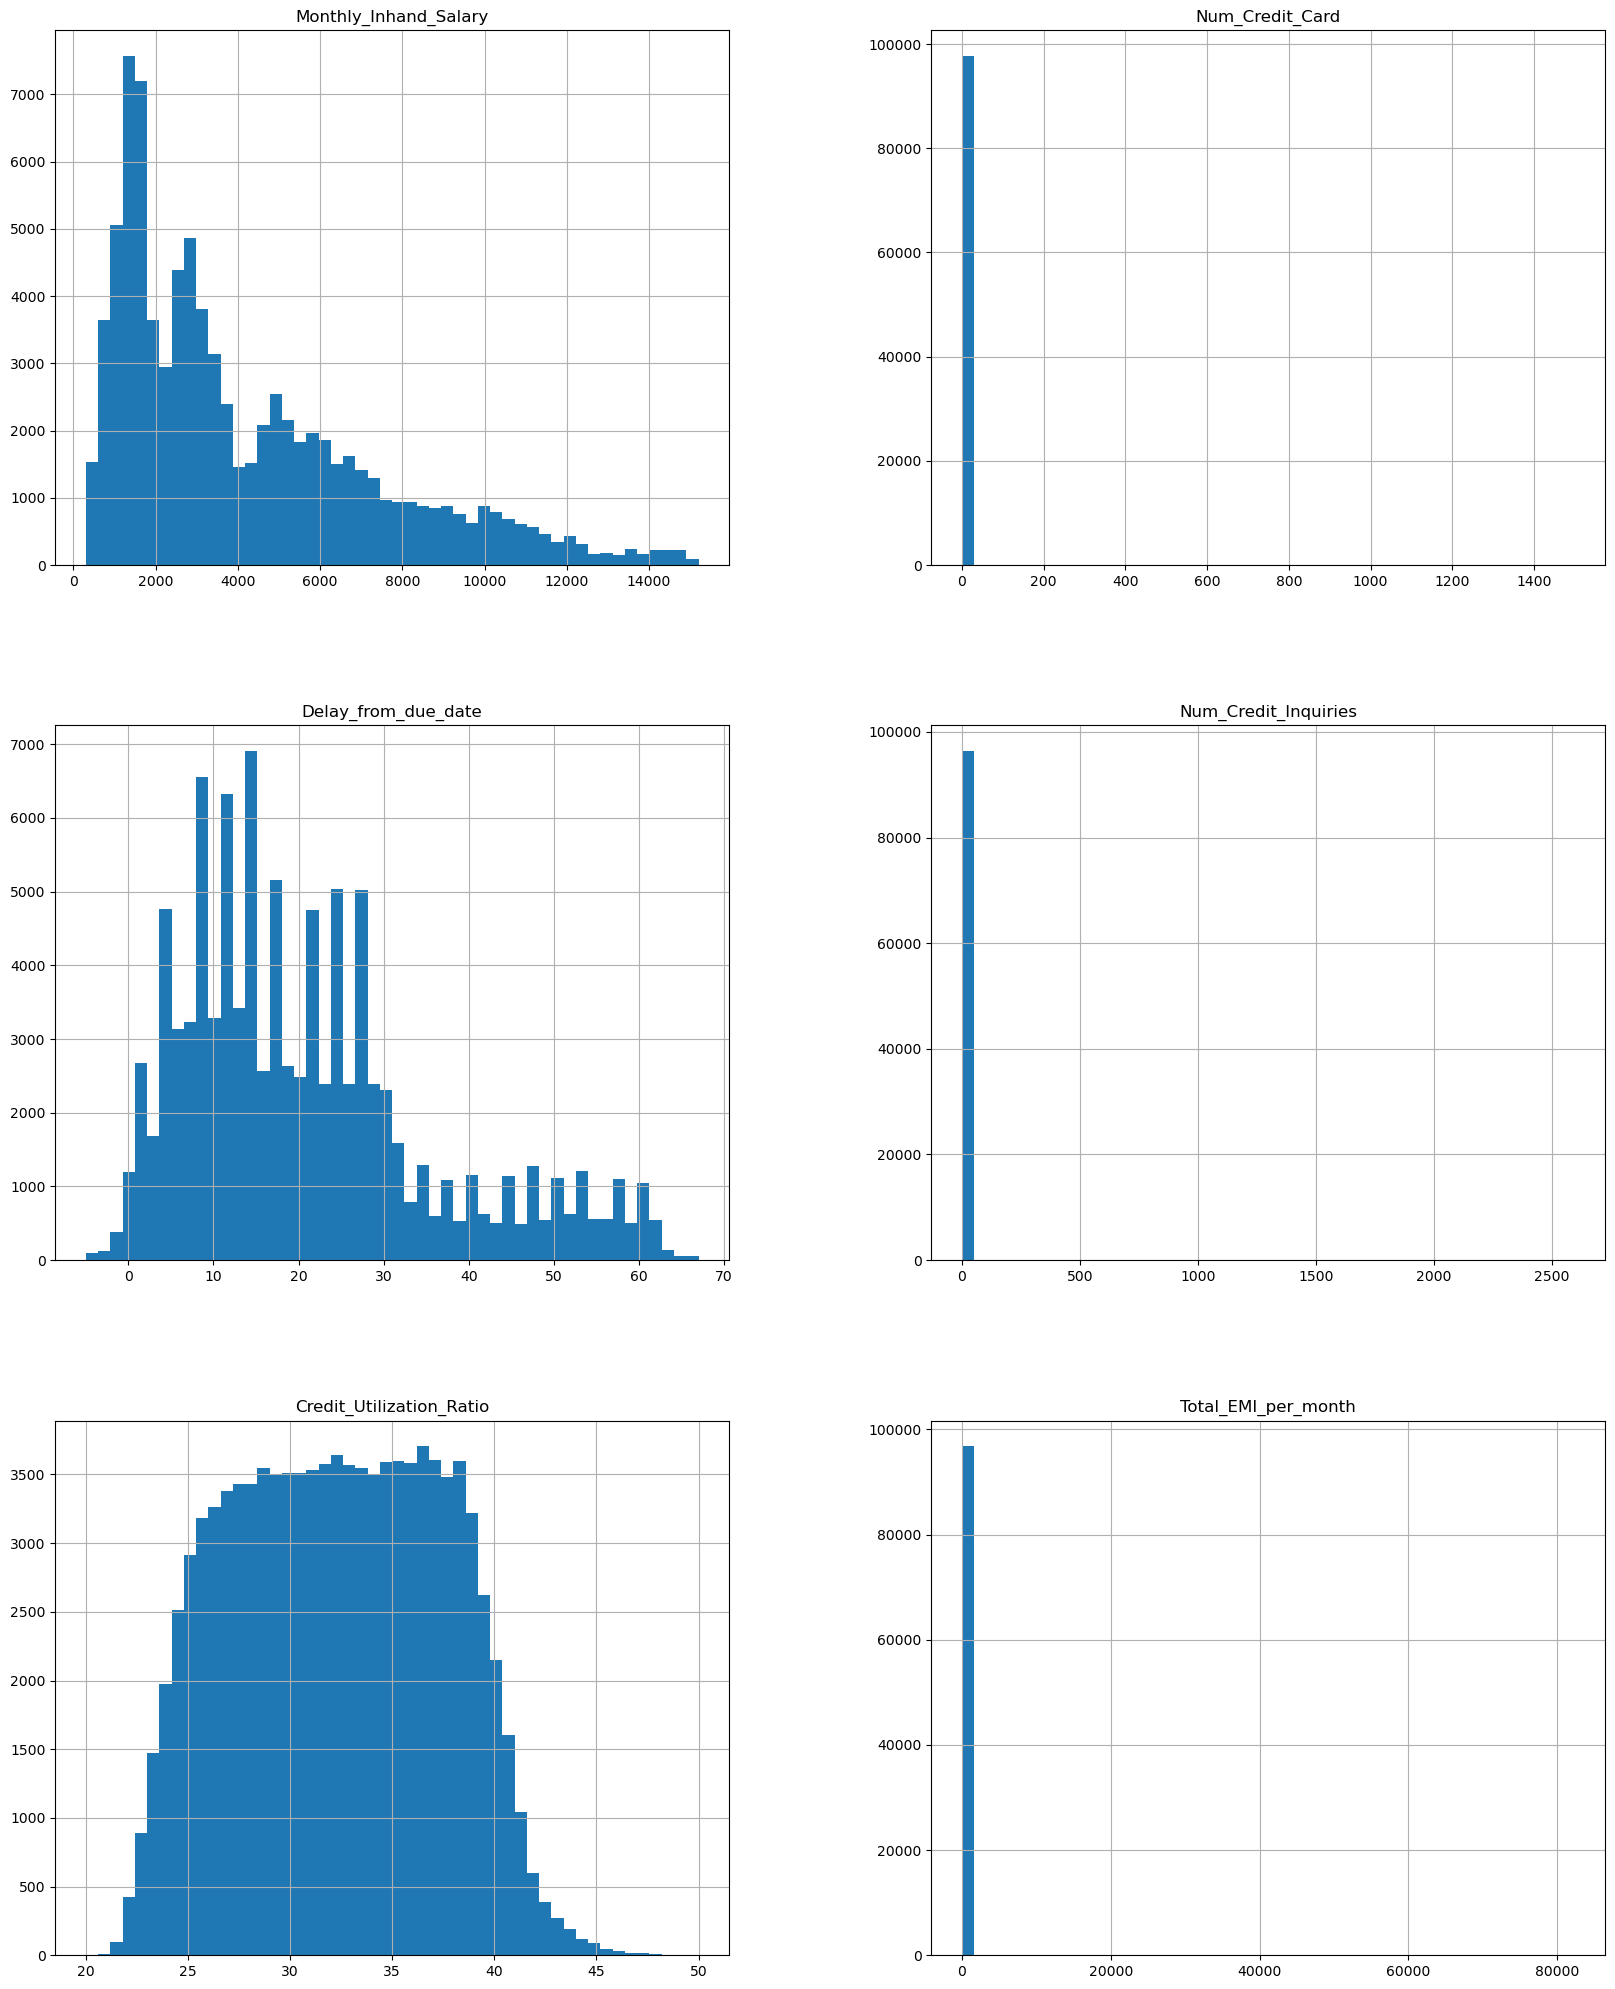

In [124]:
#Histograms of Annual Income
df_encoded.hist(bins=50, figsize=(20,25))

In [125]:
#Heat map to show correlation,plotting graphical correlation matrix
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr = df_encoded.corr()
print(corr)


                          Annual_Income  Monthly_Inhand_Salary  \
Annual_Income                  1.000000               0.030519   
Monthly_Inhand_Salary          0.030519               1.000000   
Num_Credit_Card                0.001250              -0.005049   
Num_of_Loan                    0.001464              -0.010398   
Delay_from_due_date           -0.010631              -0.250100   
Num_of_Delayed_Payment         0.001180               0.000917   
Changed_Credit_Limit           0.000615              -0.174933   
Num_Credit_Inquiries           0.003153              -0.008867   
Outstanding_Debt              -0.003706              -0.269727   
Credit_Utilization_Ratio       0.010316               0.173192   
Total_EMI_per_month           -0.000248               0.007264   
Monthly_Balance                0.000818              -0.000806   
Credit_Score_Good              0.002776               0.174260   
Credit_Score_Poor             -0.009583              -0.164341   
Credit_Sco

<function matplotlib.pyplot.show(close=None, block=None)>

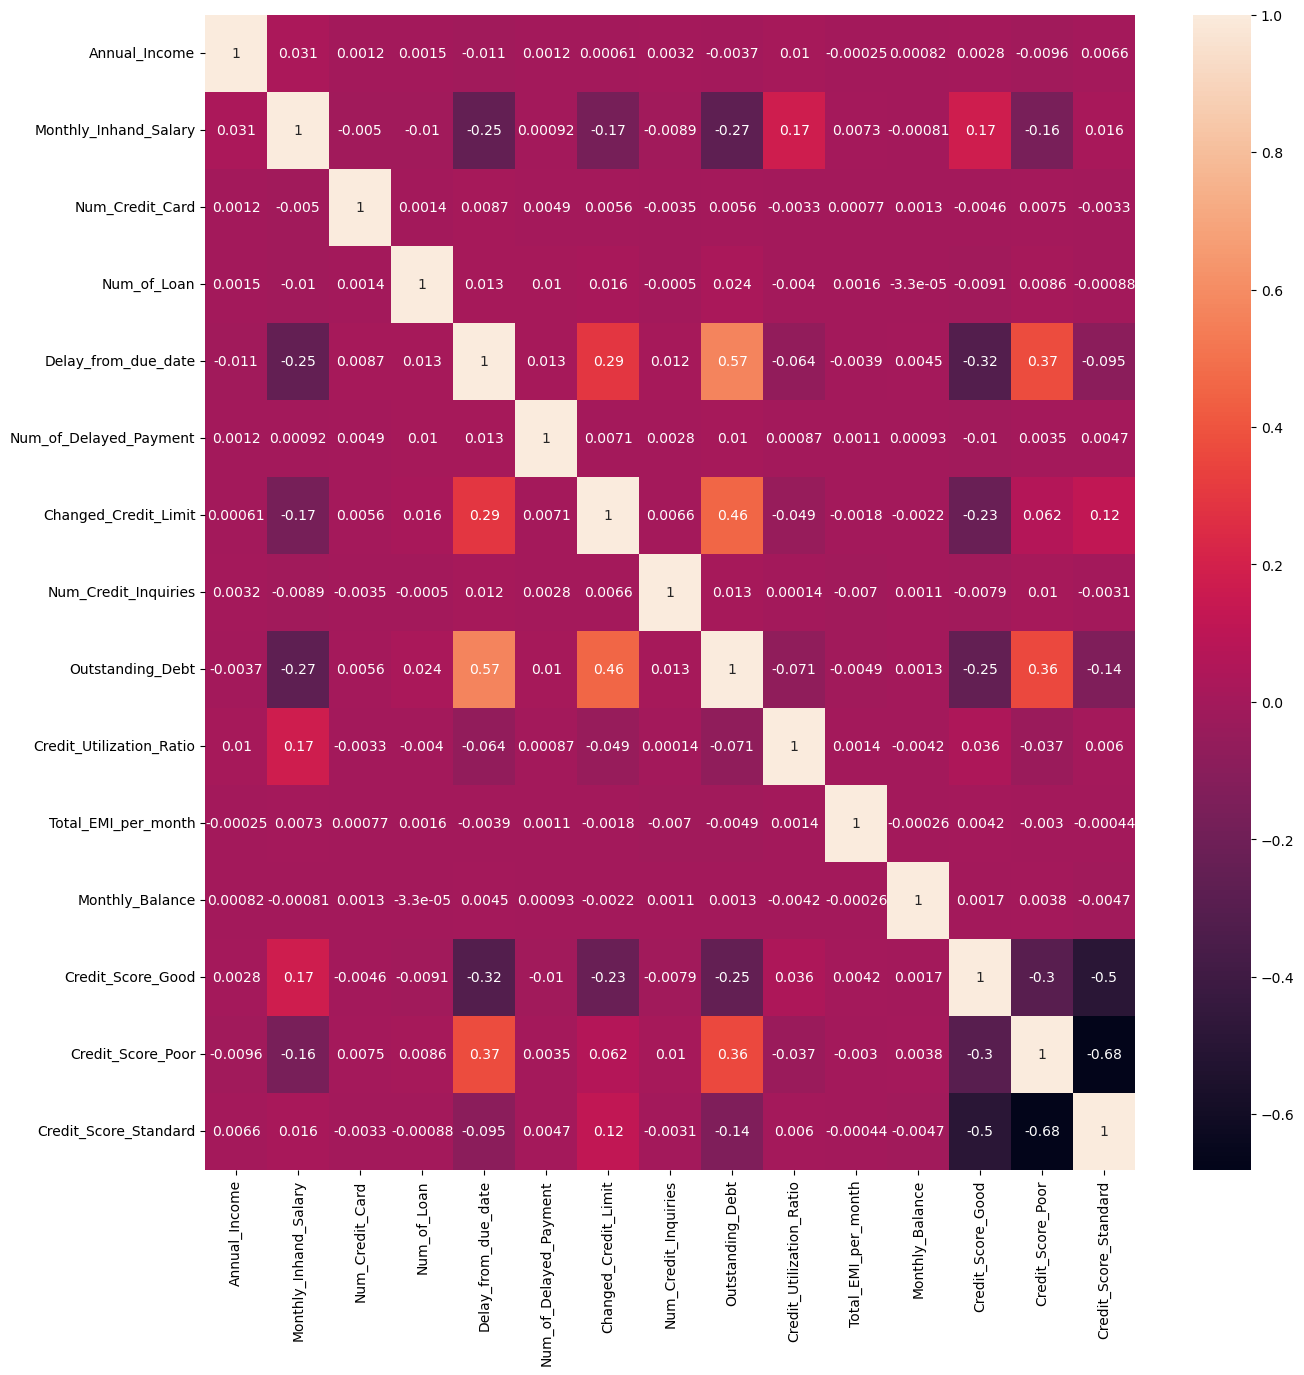

In [127]:
#making heat map larger in size
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True)
plt.show